<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [45]:
yelp.shape

(10000, 9)

In [236]:
reviews = yelp['text']


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [47]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

## Lemmatization

In [276]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        lemmas.append(token.lemma_)
    lemmas = ' '.join(lemmas)
    return lemmas

In [277]:
reviews = yelp['text']
clean = []
for review in reviews:
    clean.append(get_lemmas(review))

In [278]:
clean[5]

'tasty , fast casual latin street food .   the menu can be overwhelming at first but everything -PRON- have try be good .   -PRON- recommend try an arepa .   also , the nacho be an extremely good bang for -PRON- buck - one be really enough for two people .   the space be pretty small , and this can be problematic for friday lunch or taco tuesday .'

## Tokenization

In [279]:
reviews = yelp['text']

In [288]:
import re
tokenizer = Tokenizer(nlp.vocab)

STOPWORDS = nlp.Defaults.stop_words.union(['yelp', 'i', 'we', ' ', 'PRON', ''])

def tokenize(doc):
    
    # Split, Shift to Lowercase
    tokens = tokenizer(doc)
    
    # Strip punctucation
    tokens = [re.sub(r'[^a-zA-Z ^0-9]', ' ', token.text) for token in tokens]
    
    # Strip whitespace
    tokens = [token.strip() for token in tokens]
        
    # Remove StopWords
    tokens = [token for token in tokens if token not in STOPWORDS]
    
    
    return tokens


In [289]:
token_reviews = []
for reviews in clean:
    token_reviews.append(tokenize(reviews))

In [290]:
token_reviews[5]

['tasty',
 'fast',
 'casual',
 'latin',
 'street',
 'food',
 'menu',
 'overwhelming',
 'try',
 'good',
 'recommend',
 'try',
 'arepa',
 'nacho',
 'extremely',
 'good',
 'bang',
 'buck',
 'people',
 'space',
 'pretty',
 'small',
 'problematic',
 'friday',
 'lunch',
 'taco',
 'tuesday']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [61]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',
                             max_features=5000,
                             tokenizer=tokenize)

In [62]:
vectorizer.fit(reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x185c01488>, vocabulary=None)

In [63]:
dtm = vectorizer.transform(reviews)
dtm = pd.DataFrame(dtm.todense(), columns = vectorizer.get_feature_names())

In [64]:
dtm.shape

(10000, 5000)

### Find Similiar Reviews to Input

In [67]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [70]:
fake_review = """I'm not sure why this restaurant gets so many mixed reviews, but what I do know is this place is LEGIT. 

If your idea of good Italian food is Olive Garden, you're right, you probably won't like it here. The prices are way higher, with no unlimited soup and salad. But the saying rings true... "You get what you pay for." 

We started the meal off with the Brushette Pomodoro, which was only 5 bucks and it was just like my uncle Tony would make it. For our main courses, I had the Linguini Pescadro and my boyfriend had the Black Truffle Risotto. 

Mine was better because I normally pick the winner at the table, however he was satisfied with his as well. The portions aren't huge by any means, but just right. This is fine dining, and good things come in small packages! My linguini had so much of the good stuff, it was unreal. Scallops, mussels, clams, shrimp and mahi. I will remember this spot when I am craving fine Italian food in SD. 

We wrapped the meal up with an espresso and tirimisu for two, which again, was delicious. I was really impressed by Solare, the food, the service, and the atmosphere."""

In [72]:
new = vectorizer.transform([fake_review])

In [81]:
similiar_reviews = nn.kneighbors(new.todense(), n_neighbors=10)

In [96]:
for num in similiar_reviews[1][0]:
    print(reviews[num])
    print('------------')

Good food and service - back patio, small but comfortable.

Fair prices for this type of establishment/cuisine.

Had a good time.
------------
There is really nothing special about this place. 
The food is good and the choices are decent.
It's more of a Italian-American mix
Good for catching hockey games.
------------
The Place looks clean
The food is good and the price is good 

but if you're buying take out just remember that they don't have disposable plates
------------
I think it's hard to find a GOOD salad in the Burgh ...
This place serves some good salad. 
Highly recommended.
------------
Service is great, but food is just mediocre. 

They have a pretty good selection of food but nothing too extraordinary. 

Expect to pay around $30 per person for breakfast.
------------
Their Pupusas Revueltas rock, especially when you got extra burnt cheesey bits from the flat top.

I also love their version of Horchata which is made with toasted/burnt rice powder...The masa in their tamales 

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [100]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(yelp, test_size=0.2, random_state=42)

train.shape, test.shape

((8000, 9), (2000, 9))

In [102]:
X_train = train['text']
X_test = test['text']
y_train = train['stars']
y_test = test['stars']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000,), (2000,), (8000,), (2000,))

In [119]:
X_train.head()

9254    Be warned now: their sauce is super sweet. Not...
1561    An accurate depiction of a hidden gem. Tups is...
1670    Excellent food and service. Had the saag panee...
6087    This place is awesome! It feels like the best ...
6669    I am the unfortunate tenant from Barrett Eastm...
Name: text, dtype: object

In [140]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

vect = CountVectorizer(stop_words='english',
                    max_features=10000,
                    tokenizer=tokenize)
lr = LogisticRegression(solver='lbfgs', multi_class='auto')

pipe = Pipeline([ 
    ('vect', vect),
    ('lr', lr)
])

In [141]:
pipe.fit(X_train, y_train)

/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=10000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x185c01488>,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                           

In [142]:
train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score

print(f'Train Accuracy: {accuracy_score(y_train, train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, test_pred)}')

Train Accuracy: 0.98375
Test Accuracy: 0.585


In [144]:
y_train.value_counts(normalize=True)

5    0.449125
4    0.218250
1    0.148125
3    0.106000
2    0.078500
Name: stars, dtype: float64

### Predict Fake Review

In [145]:
pipe.predict([fake_review])[0]

4

## Grid Search

In [146]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_features': (5000, 10000, None),
    'lr__max_iter': (100, 1000, 2000) 
}

In [147]:
grid_search = GridSearchCV(pipe, 
                           parameters, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=10)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 15.8min remaining:   44.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 16.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=10000,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [151]:
grid_train_pred = grid_search.predict(X_train)

In [153]:
grid_test_pred = grid_search.predict(X_test)

In [154]:
print(f'Train Accuracy: {accuracy_score(y_train, grid_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, grid_test_pred)}')

Train Accuracy: 0.9905
Test Accuracy: 0.5885


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [158]:
import gensim

from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora

In [162]:
id2word = corpora.Dictionary(token_reviews)
id2word.filter_extremes(no_below=10, no_above=0.75)

In [163]:
corpus = [id2word.doc2bow(token) for token in token_reviews]

In [164]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=15,
                   passes=10,
                   workers=4)

In [168]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]

In [169]:
topics

['the i we  time great   nice like it',
 'i    the they time dont place like staff',
 'i room hotel the store stay rooms  service donuts',
 'i great the hair   amazing recommend  she time',
 'i the  place good like food its it dont',
 'food bar we i service drinks great the drink time',
 'i service    good time we the said minutes',
 '  i the good we  it    food they',
 'i  it the time   said like people told',
 'i food the pizza service sushi we place  good',
 ' i the cream it ice good its they place',
 'i  the it good great food chicken my place',
 'great food place service  good the love friendly staff',
 ' we i the   school there son told he',
 ' i the   it good food like sauce its']

In [170]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [172]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.132855 -0.008603       1        1  16.365906
4      0.030407 -0.042542       2        1  12.929937
14     0.074402 -0.085040       3        1  12.292400
1     -0.141756  0.037541       4        1   9.767025
10     0.031907 -0.052998       5        1   7.288084
7     -0.040561 -0.042114       6        1   7.182679
0      0.027616 -0.055330       7        1   6.474113
11     0.080434 -0.073820       8        1   5.748734
12     0.166685  0.124155       9        1   5.338476
3     -0.050671  0.167378      10        1   4.351853
5      0.122967  0.057227      11        1   3.697810
9      0.098932 -0.022230      12        1   3.595319
2     -0.121593 -0.026162      13        1   2.675023
13    -0.049603  0.025397      14        1   1.149355
6     -0.096312 -0.002859      15        1   1.143291, topic_info=     Category          Freq       Term         Total  loglift  logprob
0     Default  13957.000000             13957.000000  30.0000  30.0000
57    Default  17005.000000             17005.000000  29.0000  29.0000
17    Default  28997.000000          i  28997.000000  28.0000  28.0000
158   Default   4861.000000       food   4861.000000  27.0000  27.0000
220   Default   4363.000000      great   4363.000000  26.0000  26.0000
145   Default   3529.000000         we   3529.000000  25.0000  25.0000
140   Default   4792.000000      place   4792.000000  24.0000  24.0000
51    Default   3589.000000    service   3589.000000  23.0000  23.0000
36    Default   9645.000000        the   9645.000000  22.0000  22.0000
110   Default    904.000000       room    904.000000  21.0000  21.0000
44    Default   4546.000000       good   4546.000000  20.0000  20.0000
150   Default   1041.000000        bar   1041.000000  19.0000  19.0000
396   Default    734.000000      pizza    734.000000  18.0000  18.0000
38    Default   3471.000000       time   3471.000000  17.0000  17.0000
736   Default   1683.000000       love   1683.000000  16.0000  16.0000
43    Default   1426.000000   friendly   1426.000000  15.0000  15.0000
206   Default   1366.000000    amazing   1366.000000  14.0000  14.0000
782   Default    525.000000      sushi    525.000000  13.0000  13.0000
1691  Default    399.000000      hotel    399.000000  12.0000  12.0000
671   Default    736.000000     drinks    736.000000  11.0000  11.0000
197   Default   1196.000000  recommend   1196.000000  10.0000  10.0000
805   Default    704.000000      store    704.000000   9.0000   9.0000
221   Default    386.000000       hair    386.000000   8.0000   8.0000
27    Default    938.000000    minutes    938.000000   7.0000   7.0000
32    Default   1236.000000       said   1236.000000   6.0000   6.0000
53    Default   1563.000000      staff   1563.000000   5.0000   5.0000
362   Default   1235.000000  delicious   1235.000000   4.0000   4.0000
129   Default   1879.000000       best   1879.000000   3.0000   3.0000
378   Default    924.000000         he    924.000000   2.0000   2.0000
414   Default   2432.000000       they   2432.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
1860  Topic15     14.745309      quote     55.813412   3.1402  -6.1021
884   Topic15     20.001814       says    123.975151   2.6470  -5.7972
27    Topic15     46.625546    minutes    938.936462   1.4687  -4.9509
502   Topic15     34.122250         ok    460.480011   1.8689  -5.2631
146   Topic15     28.174515         15    298.505981   2.1109  -5.4546
32    Topic15     49.597523       said   1236.878418   1.2549  -4.8891
17    Topic15    165.385269          i  28997.468750  -0.6954  -3.6848
44    Topic15     77.879303       good   4546.754395   0.4043  -4.4379
38    Topic15     68.674423       time   3471.522217   0.5483  -4.5637
442   Topic15     42.231701        but    957.992004   1.3496  -5.0499
1133  Topic15     35.760036     coffee    602.675415   1.

In [177]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, reviews, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=reviews, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [182]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        reviews=token_reviews,
                                                        start=3,
                                                        limit=18,
                                                        step=6)

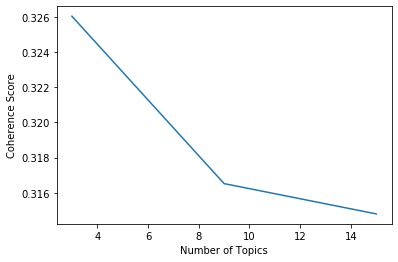

In [183]:
import matplotlib.pyplot as plt

x = range(3,18,6)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

**Interpretation**

- As currently constructed it likely makese sense to limit the number of topics to less than 8. As shown by the coherence score visualization beyond 8 topics the coherence of each topic falls off. Moreover, looking at the pyLDAvis one can see that with 15 topics there is signficant overlap between topics. 

- We can also see that several words that are important for each topic likely shouldn't be. For example, 'I' occurs in almost every topic and some of the topics contain empty strings as important words. A thorough cleaning of the text and more aggressive removal of uninformative words would likely be beneficial. Moreover, lemmitization may help increase the importance of some complex words. 

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)